<h1 style= 'color: cornflowerblue'> Project 1 - Exploratory Data Analysis </h1>


<h2 style= 'color: cornflowerblue'>Motivation and Goals</h2>

<p> This study will be conducted with data from the ENEM (Brazil's Nacional High School's Exam). It's data is from <a href = "https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem">INEP</a>.</p>

<img src = "./assets/CRISP-DM_Projeto1.png">

<p> The project will focus on the first and second pahses of CRISP-DM. they are:
<ul type = 'circle'>
<li> Business Understanding: Objectives and Requirements.
    <ul type = 'circle'>
    <li> Determine business objectives: Understand, from a business perspective, what the customer really wants to accomplish and then define success criteria.
    <li> Assess situation: Determine resources availability, project requirements, risks and contigencies and cost-benefit analysis.
    <li> Determine data mining goals: determine success from a technical data minig perspectiive.
    <li> Produce project plan: Select technologies/tools and define plans for each project phase
    </ul>
<br>
<li> Data Understanding: Identify, collect and analyze data sets.
    <ul type = 'circle'>
    <li> Collect Initial Data: Acquire the necessary data and load into the analysis tool.
    <li> Describe Data: Examine and document the data properties, formats, records (and its numbers) and identities.
    <li> Explore Data: Query, visualize and identify relations.
    <li> Verify Data Quality: Document any quality issues with the data.
    </ul>

<p> This study becomes relevant once ENEM grade can be used for several objectives:<br>
<ul type='circle'>
<li> Sistema de Seleção Unificada (Sisu) - centralized system that uses ENEM grades for applying for universities;
<li> Programa Universidade para Todos (ProUni) - Government program for scholarships to low-income students;
<li> Accepted in more than 50 universities from Portugal;
<li> Student Loans Programs;
<li> Gathers data for educational studies and indicators.<a href = "https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem">[1]</a></ul></p>
<br>
<p> The goal of the current study is to asessess whether demographic factors, social background, parental education level and other indicators of applicants have any correlation with their grades.

<h2 style= 'color: cornflowerblue'>Import Libraries</h2>

In [1]:
# Data Manipulation
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px

import os

In [2]:
# Configuring Pandas to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configuring Pandas to not show numbers in scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Setting plot styles 
sns.set_style("darkgrid")

# Color Palette for Seaborn
sns.set_palette("dark")

<h2 style= 'color: cornflowerblue'>Data Frame</h2>

In [3]:
"""
At first the data file was in csv format. It took quite some time to load.
To change that, the file was first loaded with:
    df_enem = pd.read_csv(r".\data\enem_2023.csv", sep=";", encoding='latin1')
Than saved with 
    df_enem.to_parquet(".\data\enem_2023.parquet")

Both fils mus be downloaded from https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem
This happens because the full data is a csv of 1.7 Gb and the parquet is over 400mb. Both sizes are not possible to upload to github.
"""

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nicol\AppData\Local\Temp\ipykernel_17940\910325772.py:1: SyntaxWarning: invalid escape sequence '\d'
  """


'\nAt first the data file was in csv format. It took quite some time to load.\nTo change that, the file was first loaded with:\n    df_enem = pd.read_csv(r".\\data\\enem_2023.csv", sep=";", encoding=\'latin1\')\nThan saved with \n    df_enem.to_parquet(".\\data\\enem_2023.parquet")\n\nBoth fils mus be downloaded from https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem\nThis happens because the full data is a csv of 1.7 Gb and the parquet is over 400mb. Both sizes are not possible to upload to github.\n'

In [4]:
# Getting the full data
df_enem = pd.read_parquet("./Data/enem_2023.parquet")

In [5]:
# In case of working with a smaller sample, remove the # from the code bellow:
# In the current case it is set to 10%.

# df_enem10 = df_enem.sample(n=len(df_enem)//10, random_statate=42, replace = False)
# df_enem10.to_parquet("./Data/enem_2023_10.parquet")

In [6]:
# Shape of the data frame
df_enem.shape

(3933955, 76)

In [7]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,4305108,Caxias do Sul,43,RS,1,1,1,1,1221.00,1193.00,1204.00,1211.00,502.00,498.90,475.60,363.20,DBEBDCECCBCEBBBBDBABDDBBAABCBACDBACECCBAADEBB,ABDEADAADCDABDCADAEABCDDCBAADCCBEBCEBEBDBEAED,ACEBDCABAACAEBAECEBBBAAECBBDEADCAECCCEDDABEED,CEAEACCCDABCDAACEDDBAAEBABDDEEBDAECABDBCBCADE,1,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,1.00,0,2304400.00,Fortaleza,23.00,CE,2.00,1.00,1.00,2304400,Fortaleza,23,CE,1,1,1,1,1224.00,1192.00,1202.00,1214.00,459.00,508.50,507.20,466.70,DEEBEACCCEBDDBDCCCAEEDCBAAADBCBEEEDCDAAECBEEC,DDAAEEBCCDEADBCDDCBAECABEBDEBDABECECEDCDDAEED,ADBDADAEEEACAABBACADCAEBBAAEBBCDEBBDDADDCADAA,EECBAEDEEDDDBBAADEECDBBBECEAACEAEECDBEDDBCDCB,0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,1.00,0,2311306.00,Quixadá,23.00,CE,2.00,1.00,1.00,2311306,Quixadá,23,CE,1,1,1,1,1222.00,1191.00,1201.00,1212.00,402.50,379.20,446.90,338.30,AECCEAACDEABEEECDBAEEAAADDEABCBCEBACEEDCBEABD,CADEBCEDDEBCBAEBADDCECACADBDEBABDBDBEEDBBEADC,AABBACBCAEDABDADEDAACCAEEEECAACDCADBAEACDEAAE,CDBABEDCEEBBBDECDEBACCAABDEDCBECDECABBDBDEECC,0,CAAADCCCCDDDABDCACDBEEEDCEDAEECCDBEABDBABBAEB,CDAEECABAACEAADECBDAABCDCABADCDEABAABCDDEBADB,BBDABAAEBADACEEDCCDBADBDEDCCEBCACEACAACAACACBB...,DCECACCBDECBEEABEABDDAADDABBBCCBCCDDAEBDADEEB,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [8]:
# Checking for duplicates.

df_enem.shape[0] - len(df_enem['NU_INSCRICAO'].unique())

0

In [9]:
df_enem.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

<h3 style='color: cornflowerblue'>Study Metrics</h3>
<p> For the study, a few of these columns are not going to be used. They are:
    <ul style = 'circle'>
    <li>Columns starting with 'TX': they show the applicants answers and the answer key of the subjects;
    <li>Columns starting with 'CO': they show the code of the information (some short of ID);
    <li>Columns with 'MUNICIPIO': the study is not going to consider and trace metrics for each city;
    <li>Column 'NU_INSCRICAO': the registration number is not relevant for this study;
    <li>Column 'NU_ANO': the year is already set. This columns is irrelevant for this study.

In [10]:
columns_tx = [columns for columns in df_enem.columns if columns.startswith('TX')]
columns_tx

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [11]:
columns_co = [columns for columns in df_enem.columns if columns.startswith('CO')]
columns_co

['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [12]:
columns_municipio = [columns for columns in df_enem.columns if 'MUNICIPIO' in columns]
columns_municipio

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [13]:
rem_columns = columns_tx + columns_co + columns_municipio + ['NU_INSCRICAO', 'NU_ANO']
rem_columns

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA',
 'NU_INSCRICAO',
 'NU_ANO']

In [14]:
df_enem = df_enem.drop(rem_columns, axis='columns')
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,1,1,1,17,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,12,M,2,1,0,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,6,F,1,1,1,1,0,1,NaN,0,None,NaN,NaN,NaN,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,2,F,1,3,1,2,0,2,1.00,0,CE,2.00,1.00,1.00,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,3,F,1,3,1,2,0,2,1.00,0,CE,2.00,1.00,1.00,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [15]:
df_enem.shape

(3933955, 56)

<h3 style='color: cornflowerblue'>Data Information</h3>

<p>The data is accompanied with a dictionary describing what each column represents:</p>
<br>
<p>Marital Status (TP_ESTADO_CIVIL)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>Not Informesd</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Single</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Married / Stable Union</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Divorced</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Widowed</td>
    </tr>
</table>
</p>
<br>


<p>Age Group (TP_FAIXA_ETARIA)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>1</td>
        <td>Under 17</td>
    </tr>
    <tr>
        <td>2</td>
        <td>17</td>
    </tr>
    <tr>
        <td>3</td>
        <td>18</td>
    </tr>
    <tr>
        <td>4</td>
        <td>19</td>
    </tr>
    <tr>
        <td>5</td>
        <td>20</td>
    </tr>
    <tr>
        <td>6</td>
        <td>21</td>
    </tr>
    <tr>
        <td>7</td>
        <td>22</td>
    </tr>
    <tr>
        <td>8</td>
        <td>23</td>
    </tr>
    <tr>
        <td>9</td>
        <td>24</td>
    </tr>
    <tr>
        <td>10</td>
        <td>25</td>
    </tr>
    <tr>
        <td>11</td>
        <td>26 to 30</td>
    </tr>
    <tr>
        <td>12</td>
        <td>31 to 35</td>
    </tr>
    <tr>
        <td>13</td>
        <td>36 to 40</td>
    </tr>
    <tr>
        <td>14</td>
        <td>41 to 45</td>
    </tr>
    <tr>
        <td>15</td>
        <td>46 to 50</td>
    </tr>
    <tr>
        <td>16</td>
        <td>51 to 55</td>
    </tr>
    <tr>
        <td>17</td>
        <td>56 to 60</td>
    </tr>
    <tr>
        <td>18</td>
        <td>61 to 65</td>
    </tr>
    <tr>
        <td>19</td>
        <td>66 to 70</td>
    </tr>
    <tr>
        <td>20</td>
        <td>Over 70</td>
    </tr>
</table>
</p>
<br>

<p>Ethnicity (TP_COR_RACA)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>Not Informed</td>
    </tr>
    <tr>
        <td>1</td>
        <td>White</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Black</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Brown</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Yellow</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Indigenous</td>
    </tr>
</table>
</p>
<br>

<p>Nacionality (TP_NACIONALIDADE)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>Not Informed</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Brazilian</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Brazilian Naturalized</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Foreign</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Brazilian, Born Abroad</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Indigenous</td>
    </tr>
</table>
</p>
<br>

<p>Education (TP_ST_CONCLUSAO)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>1</td>
        <td>High School Completed</td>
    </tr>
    <tr>
        <td>2</td>
        <td>High School Graduation in 2019</td>
    </tr>
    <tr>
        <td>3</td>
        <td>High School Graduation after 2019</td>
    </tr>
    <tr>
        <td>4</td>
        <td>High School not Completed / Not in High School</td>
    </tr>
</table>
</p>
<br>

<p>Parents Education (Q001 , Q002)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>A</td>
        <td>Never Studied</td>
    </tr>
    <tr>
        <td>B</td>
        <td>Did not finish 4th or 5th grade</td>
    </tr>
    <tr>
        <td>C</td>
        <td>Finish 4th or 5th grade, but not 8th or 9th</td>
    </tr>
    <tr>
        <td>D</td>
        <td>Finish 8th or 9th grade, but not high school</td>
    </tr>
    <tr>
        <td>E</td>
        <td>Finish high school, but not university</td>
    </tr>
    <tr>
        <td>F</td>
        <td>Finish university, but not post graduation</td>
    </tr>
    <tr>
        <td>G</td>
        <td>Finish post graduation</td>
    </tr>
    <tr>
        <td>H</td>
        <td>Don't know</td>
    </tr>
</table>
</p>
<br>

<p>Family Income (Q006)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>A</td>
        <td>Not Informed</td>
    </tr>
    <tr>
        <td>B</td>
        <td>Up to R$998,00</td>
    </tr>
    <tr>
        <td>C</td>
        <td>From R$998,01 to R$1497,00</td>
    </tr>
    <tr>
        <td>D</td>
        <td>From R$1497,01 to R$1996,00</td>
    </tr>
    <tr>
        <td>E</td>
        <td>From R$1996,01 to R$2495,00</td>
    </tr>
    <tr>
        <td>F</td>
        <td>From R$2495,01 to R$2994,00</td>
    </tr>
    <tr>
        <td>G</td>
        <td>From R$2994,01 to R$3992,00</td>
    </tr>
    <tr>
        <td>H</td>
        <td>From R$3992,01 to R$4990,00</td>
    </tr>
    <tr>
        <td>I</td>
        <td>From R$4990,01 to R$5988,00</td>
    </tr>
    <tr>
        <td>J</td>
        <td>From R$6986,01 to R$6986,00</td>
    </tr>
    <tr>
        <td>K</td>
        <td>From R$6986,01 to R$7984,00</td>
    </tr>
    <tr>
        <td>L</td>
        <td>From R$7984,01 to R$8982,00</td>
    </tr>
    <tr>
        <td>M</td>
        <td>From R$8982,01 to R$9980,00</td>
    </tr>
    <tr>
        <td>N</td>
        <td>From R$9980,01 to R$11976,00</td>
    </tr>
    <tr>
        <td>O</td>
        <td>From R$11976,01 to R$14970,00</td>
    </tr>
    <tr>
        <td>P</td>
        <td>From R$14970,01 to R$19960,00</td>
    </tr>
    <tr>
        <td>Q</td>
        <td>More than R$19960,00</td>
    </tr>
</table>
</p>
<br>

<p>Grades
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>NU_NOTA_CN</td>
        <td>Grade in Nature Sciences</td>
    </tr>
    <tr>
        <td>NU_NOTA_CH</td>
        <td>Grade in Human Sciences</td>
    </tr>
    <tr>
        <td>NU_NOTA_LC</td>
        <td>Grade in Language and Codes</td>
    </tr>
    <tr>
        <td>NU_NOTA_MT</td>
        <td>Grade in Mathematics</td>
    </tr>
    <tr>
        <td>NU_NOTA_REDACAO</td>
        <td>Grade in Essay</td>
    </tr>
</table>
</p>

<h2 style="color:cornflowerblue">Descriptive Statistics</h2>

In [16]:
df_enem.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3933955.00,3933955.00,3933955.00,3933955.00,3933955.00,3933955.00,3933955.00,1339081.00,3933955.00,958506.00,958506.00,958506.00,3933955.00,3933955.00,3933955.00,3933955.00,2692427.00,2822643.00,2822643.00,2692427.00,3933955.00,2822643.00,2822643.00,2822643.00,2822643.00,2822643.00,2822643.00,2822643.00,3933955.00
mean,5.10,1.04,2.06,1.03,1.68,2.45,1.42,1.01,0.16,2.44,1.04,1.02,0.69,0.72,0.72,0.69,495.75,523.35,518.15,533.84,0.46,1.15,121.55,139.30,118.51,129.80,108.65,617.80,3.69
std,3.87,0.41,1.00,0.21,0.75,4.45,0.60,0.07,0.36,0.91,0.19,0.20,0.47,0.45,0.45,0.47,87.93,88.57,75.45,131.65,0.50,0.80,35.65,51.62,43.41,43.77,61.60,214.62,1.41
min,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,440.50,467.80,471.40,431.20,0.00,1.00,120.00,120.00,100.00,120.00,60.00,500.00,3.00
50%,3.00,1.00,2.00,1.00,2.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,493.90,530.40,523.10,523.60,0.00,1.00,120.00,140.00,120.00,120.00,120.00,620.00,4.00
75%,7.00,1.00,3.00,1.00,2.00,3.00,2.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,551.20,584.90,570.30,630.10,1.00,1.00,140.00,180.00,140.00,160.00,160.00,780.00,4.00
max,20.00,4.00,5.00,4.00,4.00,17.00,3.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,868.40,823.00,820.80,958.60,1.00,9.00,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


In [17]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 56 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         int64  
 1   TP_SEXO                 object 
 2   TP_ESTADO_CIVIL         int64  
 3   TP_COR_RACA             int64  
 4   TP_NACIONALIDADE        int64  
 5   TP_ST_CONCLUSAO         int64  
 6   TP_ANO_CONCLUIU         int64  
 7   TP_ESCOLA               int64  
 8   TP_ENSINO               float64
 9   IN_TREINEIRO            int64  
 10  SG_UF_ESC               object 
 11  TP_DEPENDENCIA_ADM_ESC  float64
 12  TP_LOCALIZACAO_ESC      float64
 13  TP_SIT_FUNC_ESC         float64
 14  SG_UF_PROVA             object 
 15  TP_PRESENCA_CN          int64  
 16  TP_PRESENCA_CH          int64  
 17  TP_PRESENCA_LC          int64  
 18  TP_PRESENCA_MT          int64  
 19  NU_NOTA_CN              float64
 20  NU_NOTA_CH              float64
 21  NU_NOTA_LC              float64

In [18]:
# List of columns with Grades
columns_grades = [column for column in df_enem if 'NOTA' in column]
columns_grades

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [19]:
# The comlumns 'NU_NOTA_COMP1' to 'NU_NOTA_COMP5' are parts of the essay. For this study, only the full grade will be considered ('NU_NOTA_REDACAO').

columns_grades = [column for column in columns_grades if 'COMP' not in column]
columns_grades

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

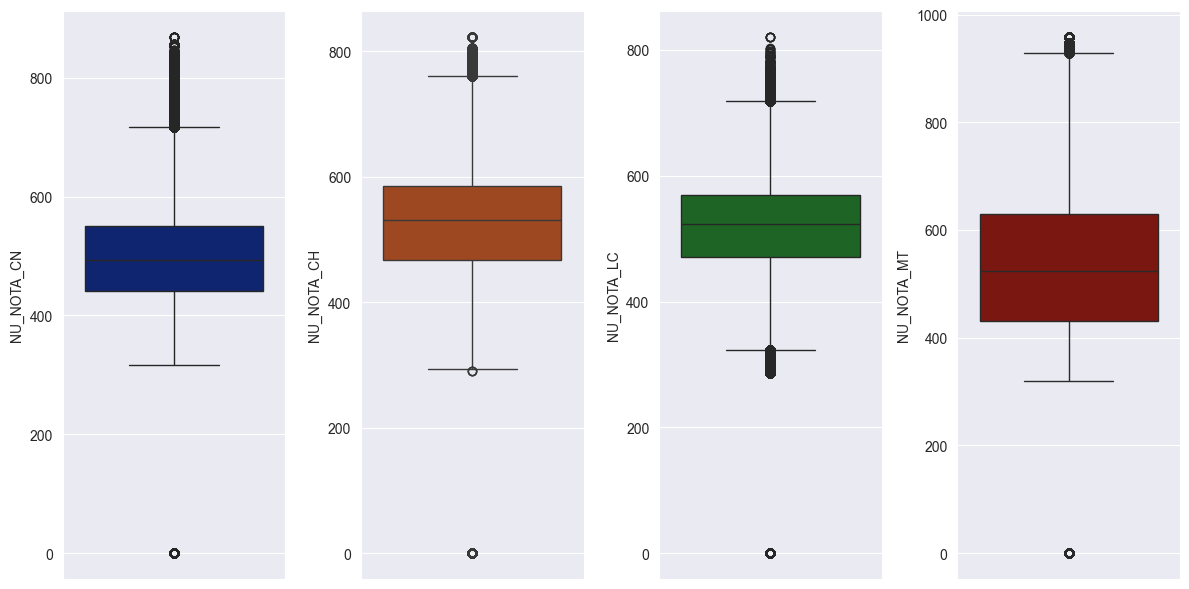

In [20]:
# Analyzing the Grades
figure, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(12,6))

for i in range(4):
    column_axes = columns_grades[i]
    sns.boxplot(data=df_enem, y=column_axes, ax=axes[i], color=sns.color_palette()[i])
    plt.tight_layout()

plt.show()

<Figure size 1800x600 with 0 Axes>

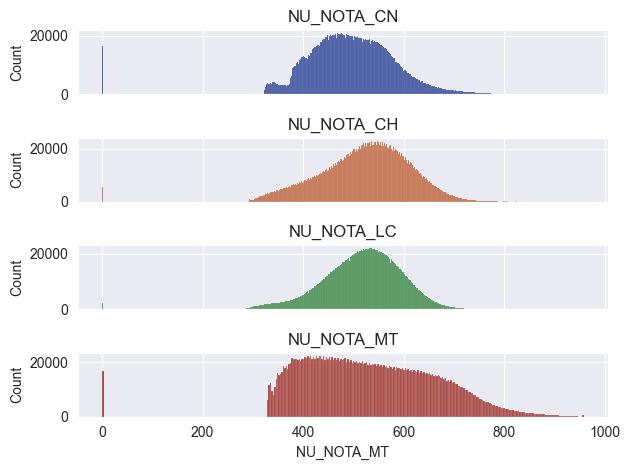

In [24]:
# Analyzing the Grades Distribution
plt.figure(figsize = (18,6))
figure,  axes = plt.subplots(4, 1, sharex = True)

for i in range(4):
    column_axes = columns_grades[i]
    sns.histplot(data=df_enem[column_axes], ax = axes[i], color=sns.color_palette()[i]).set_title(column_axes)
    plt.tight_layout()

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

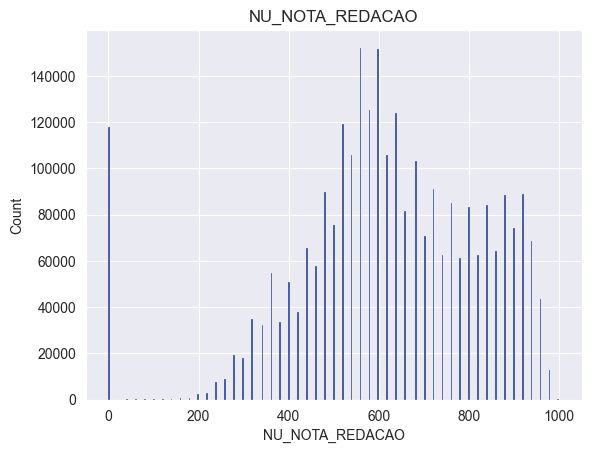

In [25]:
# Analyzing the Essay Grades

sns.histplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

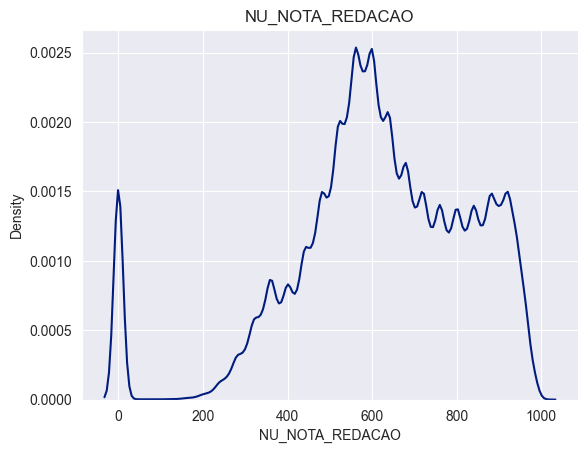

In [26]:
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

<h2 style="color:cornflowerblue">Demographic Information</h2>

In [27]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,1,1,1,17,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,12,M,2,1,0,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,6,F,1,1,1,1,0,1,NaN,0,None,NaN,NaN,NaN,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,2,F,1,3,1,2,0,2,1.00,0,CE,2.00,1.00,1.00,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,3,F,1,3,1,2,0,2,1.00,0,CE,2.00,1.00,1.00,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [28]:
# If working with part of the dataset, reset the index for better visualization:

# df_enem = df_enem.reset_indes(drop = True)
# df_enem.head()

<h3 style="color:cornflowerblue">Visualizing Age</h3>
<p>Age Group (TP_FAIXA_ETARIA)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>1</td>
        <td>Under 17</td>
    </tr>
    <tr>
        <td>2</td>
        <td>17</td>
    </tr>
    <tr>
        <td>3</td>
        <td>18</td>
    </tr>
    <tr>
        <td>4</td>
        <td>19</td>
    </tr>
    <tr>
        <td>5</td>
        <td>20</td>
    </tr>
    <tr>
        <td>6</td>
        <td>21</td>
    </tr>
    <tr>
        <td>7</td>
        <td>22</td>
    </tr>
    <tr>
        <td>8</td>
        <td>23</td>
    </tr>
    <tr>
        <td>9</td>
        <td>24</td>
    </tr>
    <tr>
        <td>10</td>
        <td>25</td>
    </tr>
    <tr>
        <td>11</td>
        <td>26 to 30</td>
    </tr>
    <tr>
        <td>12</td>
        <td>31 to 35</td>
    </tr>
    <tr>
        <td>13</td>
        <td>36 to 40</td>
    </tr>
    <tr>
        <td>14</td>
        <td>41 to 45</td>
    </tr>
    <tr>
        <td>15</td>
        <td>46 to 50</td>
    </tr>
    <tr>
        <td>16</td>
        <td>51 to 55</td>
    </tr>
    <tr>
        <td>17</td>
        <td>56 to 60</td>
    </tr>
    <tr>
        <td>18</td>
        <td>61 to 65</td>
    </tr>
    <tr>
        <td>19</td>
        <td>66 to 70</td>
    </tr>
    <tr>
        <td>20</td>
        <td>Over 70</td>
    </tr>
</table>
</p>

In [29]:
df_enem['TP_FAIXA_ETARIA'].value_counts().sort_index()

TP_FAIXA_ETARIA
1     347434
2     753800
3     905047
4     431592
5     267383
6     183401
7     137884
8     111813
9      91359
10     73127
11    246292
12    133381
13     96927
14     67135
15     40791
16     24619
17     13439
18      5503
19      2161
20       867
Name: count, dtype: int64

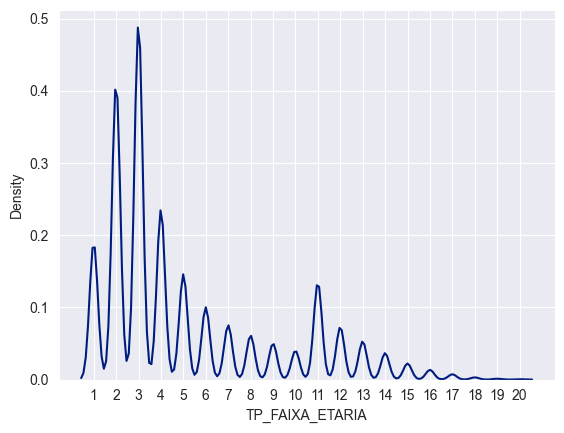

In [30]:
sns.kdeplot(data = df_enem, x = 'TP_FAIXA_ETARIA')
plt.xticks([x for x in range(1,21)])
plt.show()

<h3 style="color:cornflowerblue">Visualizing Gender</h3>

In [31]:
df_enem['TP_SEXO'].value_counts()

TP_SEXO
F    2411185
M    1522770
Name: count, dtype: int64

In [32]:
df_enem['TP_SEXO'].value_counts(normalize=True)

TP_SEXO
F   0.61
M   0.39
Name: proportion, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

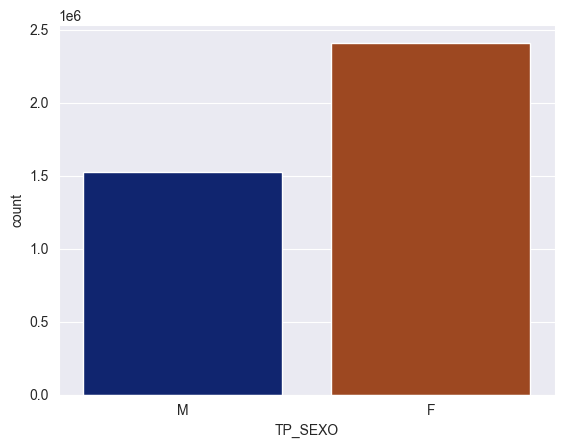

In [33]:
sns.countplot(data = df_enem, x = 'TP_SEXO', hue='TP_SEXO', palette="dark", legend=None)

<h3 style="color:cornflowerblue">Visualizing Marital Status</h3>

<p>Considering the following:<ol type=1 start=0>
    <li> Not Informed
    <li> Single
    <li> Married / Stable Union
    <li> Divorced
    <li> Widowed
    </ol>
</p>

In [34]:
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

TP_ESTADO_CIVIL
0     171900
1    3491857
2     200456
3      64933
4       4809
Name: count, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

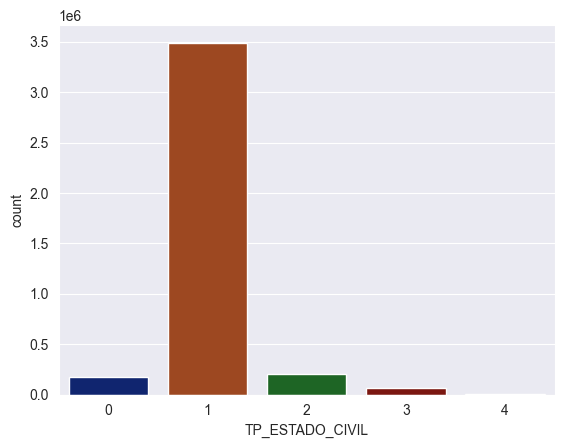

In [35]:
sns.countplot(data = df_enem, x = 'TP_ESTADO_CIVIL', hue='TP_ESTADO_CIVIL', palette="dark", legend=None)

<h3 style="color:cornflowerblue">Visualizing Ethnicity</h3>

<p>Considering the following:<ol type=1 start=0>
    <li> Not Informed
    <li> White
    <li> Black
    <li> Brown
    <li> Yellow
    <li> Indigenous
    </ol>
</p>

In [36]:
df_enem['TP_COR_RACA'].value_counts().sort_index()

TP_COR_RACA
0      52575
1    1575848
2     509511
3    1706798
4      64512
5      24711
Name: count, dtype: int64

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

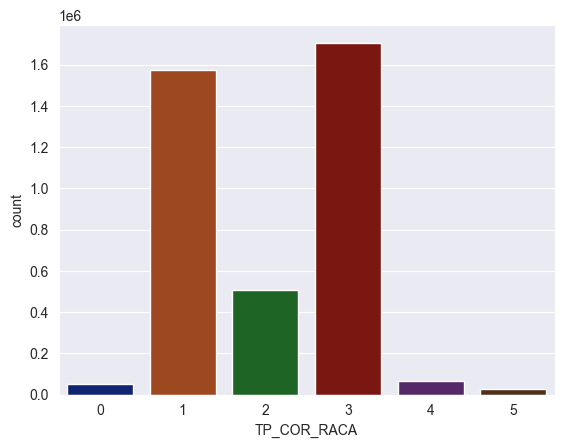

In [37]:
sns.countplot(data=df_enem, x='TP_COR_RACA', hue='TP_COR_RACA' , palette="dark", legend=None)

<h3 style="color:cornflowerblue">Visualizing Region</h3>

In [38]:
ufs = df_enem['SG_UF_ESC'].value_counts()
ufs

SG_UF_ESC
SP    187067
CE     98595
MG     66972
RJ     63842
PR     54226
GO     45796
PE     44881
BA     43453
RS     39700
PA     35212
MA     31877
SC     31480
AM     26557
PB     24870
AL     20934
ES     20626
DF     20113
PI     18393
MT     16792
RN     16776
MS     11894
SE     10277
RO     10209
TO      7336
AP      4240
AC      4111
RR      2277
Name: count, dtype: int64

In [39]:
df_ufs = pd.DataFrame({'uf':ufs.index, 'candidates': ufs.values})
df_ufs.head()

,uf,candidates
0,SP,187067
1,CE,98595
2,MG,66972
3,RJ,63842
4,PR,54226


In [40]:
fig = px.treemap(data_frame = df_ufs, path = ['uf'], values = 'candidates')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, b=25))
fig.show()

<h3 style="color:cornflowerblue">Visualizing Parents Education</h3>

<p>Considering the following:<ol type=A>
    <li> Never Studied
    <li> Did not finish 4th or 5th grade
    <li> Finish 4th or 5th grade, but not 8th or 9th
    <li> Finish 8th or 9th grade, but not high school 
    <li> Finish high school, but not university
    <li> Finish university, but not post graduation
    <li> Finish post graduation
    <li> Don't know
    </ol>
</p>

In [41]:
# Father or other male guardian

df_enem['Q001'].value_counts().sort_index()

Q001
A     174712
B     700175
C     513213
D     438139
E    1114164
F     333981
G     256045
H     403526
Name: count, dtype: int64

In [42]:
# Relevance of candidates that don't know.

len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0]

0.1025751438437908

In [43]:
# Mother or other female guardian

df_enem['Q002'].value_counts().sort_index()

Q002
A     110831
B     505525
C     437022
D     473854
E    1377605
F     455268
G     441893
H     131957
Name: count, dtype: int64

In [44]:
# Relevance of candidates that don't know.

len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0]

0.033543088316973634

In [45]:
# New column for parents/guardians with higher education

df_enem["M_HIGHER_ED"] = df_enem["Q001"].isin(["F","G"])
df_enem["F_HIGHER_ED"] = df_enem["Q002"].isin(["F","G"])

df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,M_HIGHER_ED,F_HIGHER_ED
0,14,M,2,1,1,1,17,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B,False,True
1,12,M,2,1,0,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B,True,False
2,6,F,1,1,1,1,0,1,NaN,0,None,NaN,NaN,NaN,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,False,False
3,2,F,1,3,1,2,0,2,1.00,0,CE,2.00,1.00,1.00,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,False,False
4,3,F,1,3,1,2,0,2,1.00,0,CE,2.00,1.00,1.00,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,False,False


In [46]:
df_enem["M_HIGHER_ED"].value_counts(normalize=True) * 100

M_HIGHER_ED
False   85.00
True    15.00
Name: proportion, dtype: float64

In [47]:
df_enem["F_HIGHER_ED"].value_counts(normalize=True) * 100

F_HIGHER_ED
False   77.19
True    22.81
Name: proportion, dtype: float64

<Figure size 1000x800 with 0 Axes>

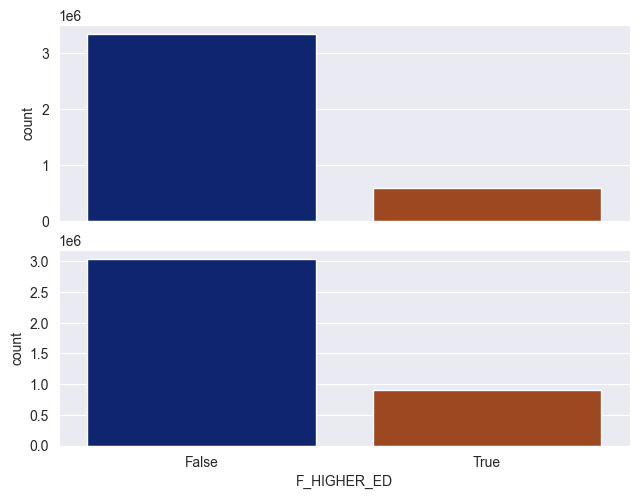

In [48]:
# Data visualization of higher education of parents/guardians

h_ed = ["M_HIGHER_ED", "F_HIGHER_ED"]
sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
figure,  axes = plt.subplots(len(h_ed), 1, sharex = True)
plt.tight_layout()

for i in range(0, len(h_ed)):
    sns.countplot(data=df_enem, ax=axes[i] , x=h_ed[i], hue=h_ed[i] , palette="dark", legend=None)

<h3 style="color:cornflowerblue">Visualizing Family Income</h3>

<p> Considering:
    <ol type=1, start=0>
    <li>Not Informed
    <li>Up to R$998,00
    <li>From R$998,01 to R$1497,00
    <li>From R$1497,01 to R$1996,00
    <li>From R$1996,01 to R$2495,00
    <li>From R$2495,01 to R$2994,00
    <li>From R$2994,01 to R$3992,00
    <li>From R$3992,01 to R$4990,00
    <li>From R$4990,01 to R$5988,00
    <li>From R$6986,01 to R$6986,00
    <li>From R$6986,01 to R$7984,00
    <li>From R$7984,01 to R$8982,00
    <li>From R$8982,01 to R$9980,00
    <li>From R$9980,01 to R$11976,00
    <li>From R$11976,01 to R$14970,00
    <li>From R$14970,01 to R$19960,00
    <li>More than R$19960,00
    </ol>
</p>

In [49]:
# Creating a column of family income

from string import ascii_uppercase

dict_inc = dict()

for i, letter in enumerate(ascii_uppercase):
    if letter == 'Q':
        dict_inc[letter] = i
        break
    dict_inc[letter] = i

df_enem['FAM_INC'] = df_enem['Q006'].map(dict_inc)

df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,M_HIGHER_ED,F_HIGHER_ED,FAM_INC
0,14,M,2,1,1,1,17,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B,False,True,5
1,12,M,2,1,0,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B,True,False,7
2,6,F,1,1,1,1,0,1,NaN,0,None,NaN,NaN,NaN,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,False,False,2
3,2,F,1,3,1,2,0,2,1.00,0,CE,2.00,1.00,1.00,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,False,False,2
4,3,F,1,3,1,2,0,2,1.00,0,CE,2.00,1.00,1.00,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,False,False,1


<Axes: xlabel='FAM_INC', ylabel='count'>

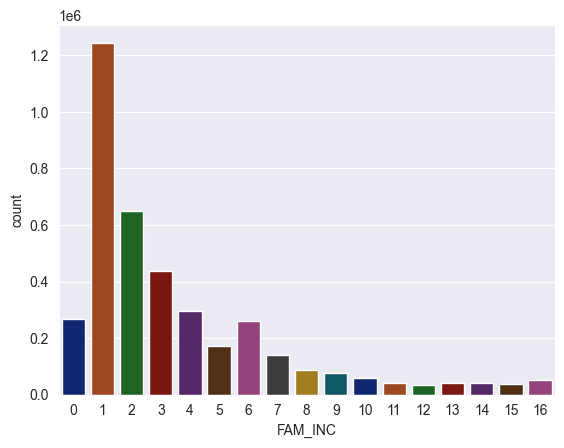

In [50]:
sns.countplot(data = df_enem, x='FAM_INC', hue='FAM_INC', palette="dark", legend=None)

In [51]:
# Dataframe of general family income
df_income = df_enem["FAM_INC"].value_counts(normalize=True).sort_index() * 100
df_income

FAM_INC
0     6.81
1    31.65
2    16.55
3    11.12
4     7.47
5     4.36
6     6.64
7     3.54
8     2.19
9     1.91
10    1.52
11    1.01
12    0.85
13    1.06
14    1.05
15    0.97
16    1.31
Name: proportion, dtype: float64

In [52]:
# Excluding not informed(0), the amout of candidates with less than R$2500 of family income (4)
familiesperc = 0
for i in range(1,5):
    familiesperc = familiesperc + df_income.iloc[i]

familiesperc


np.float64(66.79214683441981)

<h2 style="color:cornflowerblue">Comparing Demographic Information with Candidate Grades</h2>
<p>Getting information and trying to find correpation between the candidate grades and:
    <ul type='circle'><li>Age***
    <li>Gender
    <li>Civil State***
    <li>Ethnicity
    <li>Region***
    <li>Special Care
    <li>Parents Education
    <li>Family Income


<h3 style="color:cornflowerblue">Age Information</h3>

In [53]:
# Creating a age Dataframe

df_age = df_enem.loc[:, columns_grades + ['TP_FAIXA_ETARIA']]
df_age.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA
0,NaN,NaN,NaN,NaN,NaN,14
1,NaN,NaN,NaN,NaN,NaN,12
2,502.00,498.90,475.60,363.20,700.00,6
3,459.00,508.50,507.20,466.70,880.00,2
4,402.50,379.20,446.90,338.30,560.00,3


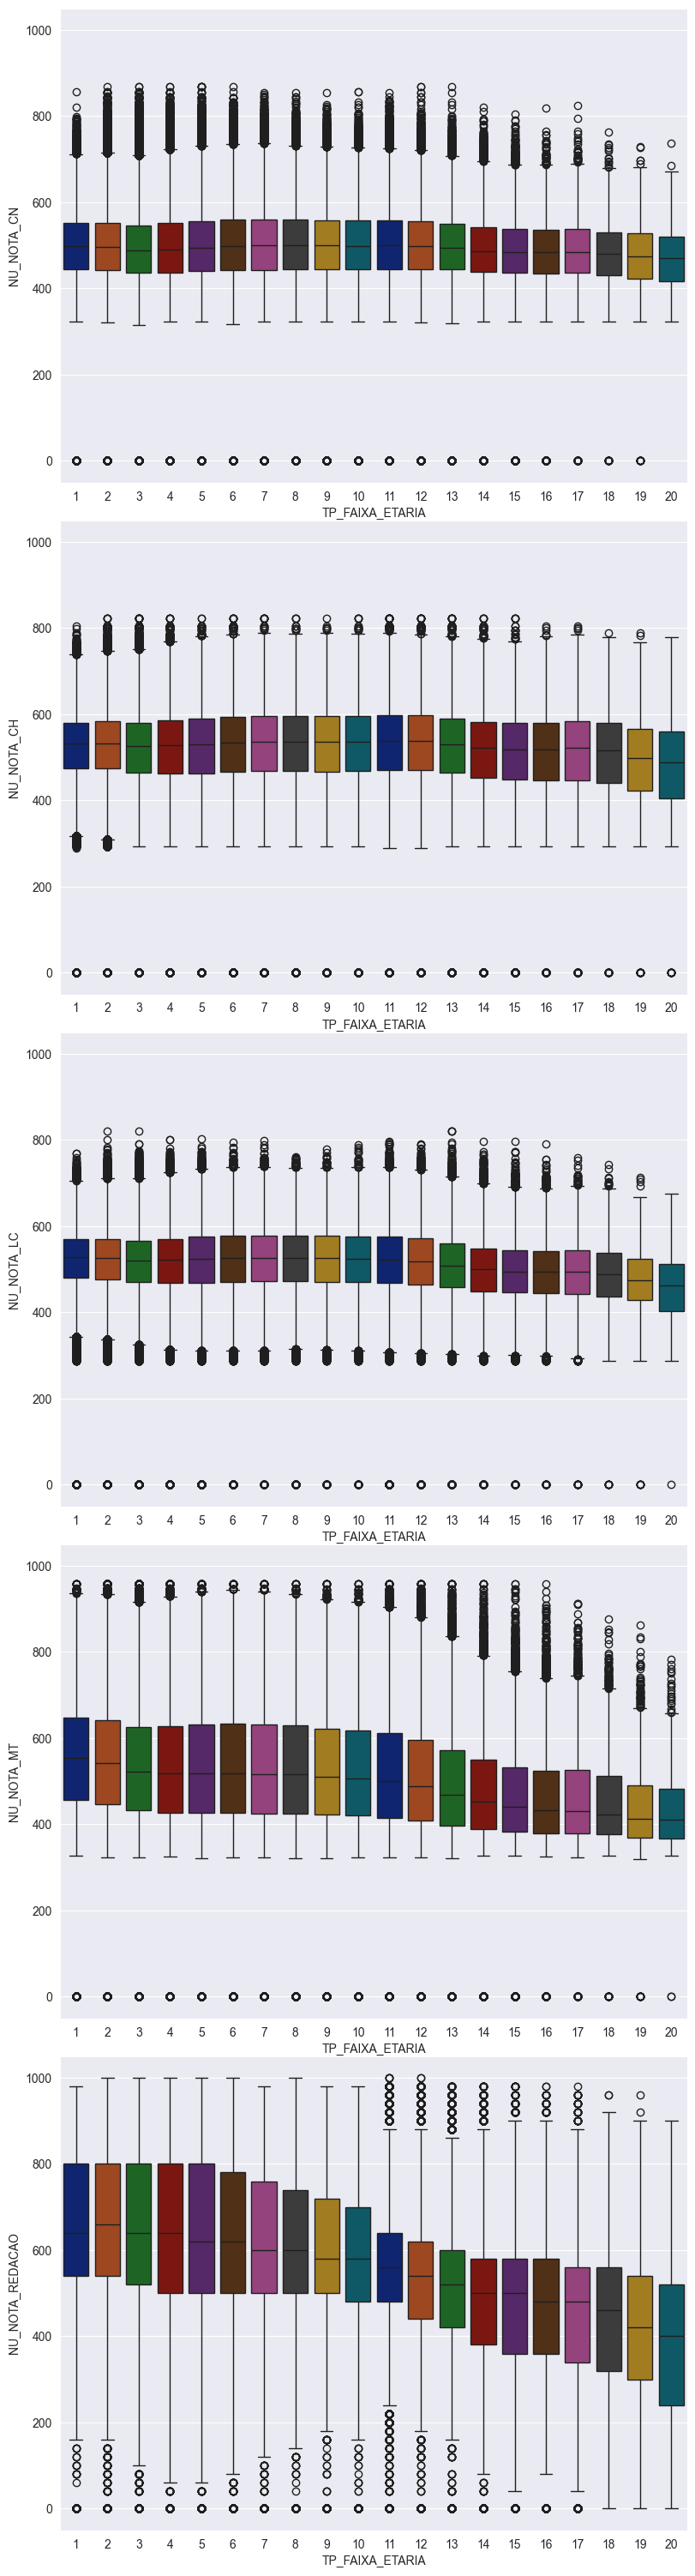

In [54]:
# Analyzing grades by age
figure, axes = plt.subplots(len(columns_grades), 1, sharey=True, figsize=(8,30))
plt.tight_layout()

for i in range(0,len(columns_grades)):
    sns.boxplot(data = df_age, x = 'TP_FAIXA_ETARIA', y=columns_grades[i], ax = axes[i], hue='TP_FAIXA_ETARIA', palette="dark", legend=None)

<Axes: >

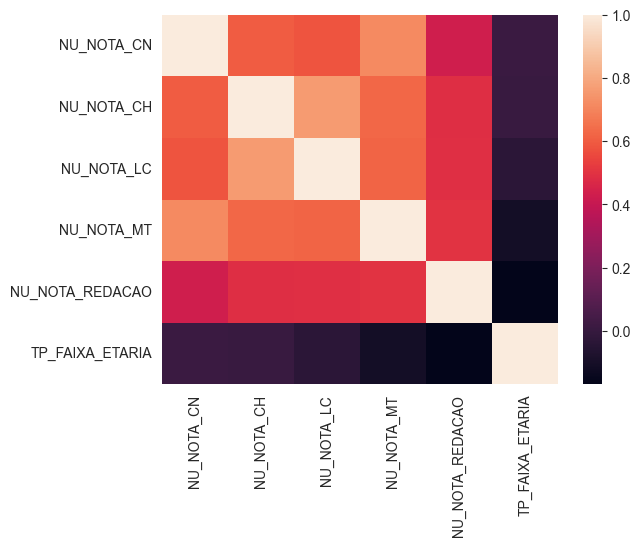

In [55]:
# Heatmap of the correlation
age_corr = df_age.corr()
sns.heatmap(age_corr)

<h3 style="color:cornflowerblue">Gender Information</h3>

In [56]:
# Creating a gender Dataframe
df_gender = df_enem.loc[:, columns_grades + ['TP_SEXO']]
df_gender.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,M
1,NaN,NaN,NaN,NaN,NaN,M
2,502.00,498.90,475.60,363.20,700.00,F
3,459.00,508.50,507.20,466.70,880.00,F
4,402.50,379.20,446.90,338.30,560.00,F


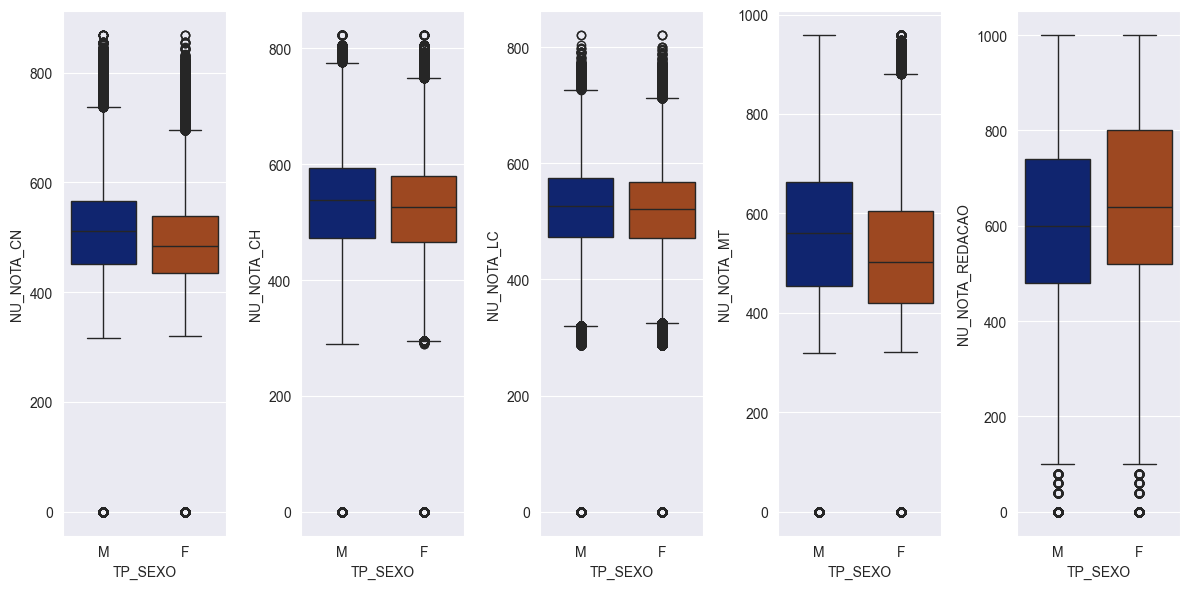

In [57]:
# Analyzing grades by gender
figure, axes = plt.subplots(1,len(columns_grades), figsize=(12,6))

for i in range(0,len(columns_grades)):
    sns.boxplot(data = df_gender, x = 'TP_SEXO', y=columns_grades[i], ax = axes[i], hue='TP_SEXO', palette="dark", legend=None)
    plt.tight_layout()


<h3 style="color:cornflowerblue">Civil State Information</h3>

In [58]:
# Creating a Civil State Dataframe

df_cstate = df_enem.loc[:, columns_grades + ['TP_ESTADO_CIVIL']]
df_cstate.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESTADO_CIVIL
0,NaN,NaN,NaN,NaN,NaN,2
1,NaN,NaN,NaN,NaN,NaN,2
2,502.00,498.90,475.60,363.20,700.00,1
3,459.00,508.50,507.20,466.70,880.00,1
4,402.50,379.20,446.90,338.30,560.00,1


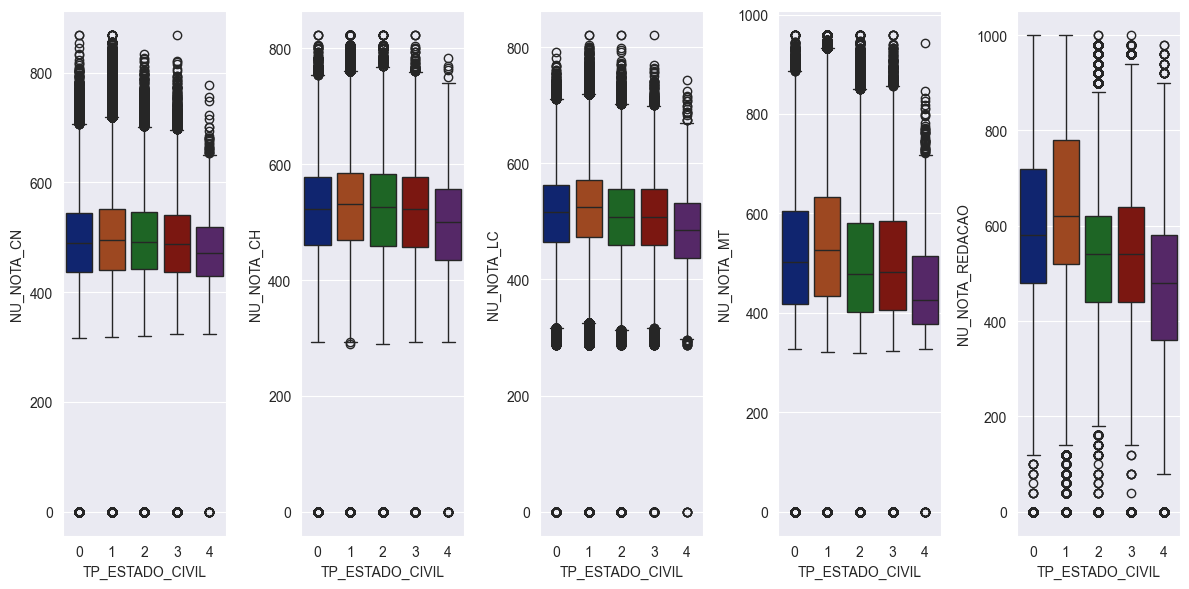

In [59]:
# Analyzing grades by civil state
figure, axes = plt.subplots(1,len(columns_grades), figsize=(12,6))

for i in range(0,len(columns_grades)):
    sns.boxplot(data = df_cstate, x = 'TP_ESTADO_CIVIL', y=columns_grades[i], ax = axes[i], hue='TP_ESTADO_CIVIL', palette="dark", legend=None)
    plt.tight_layout()

<h3 style="color:cornflowerblue">Ethnicity Information</h3>

In [60]:
# Creating a Ethnicity Dataframe
df_ethnic = df_enem.loc[: , columns_grades + ['TP_COR_RACA']]
df_ethnic.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,1
2,502.00,498.90,475.60,363.20,700.00,1
3,459.00,508.50,507.20,466.70,880.00,3
4,402.50,379.20,446.90,338.30,560.00,3


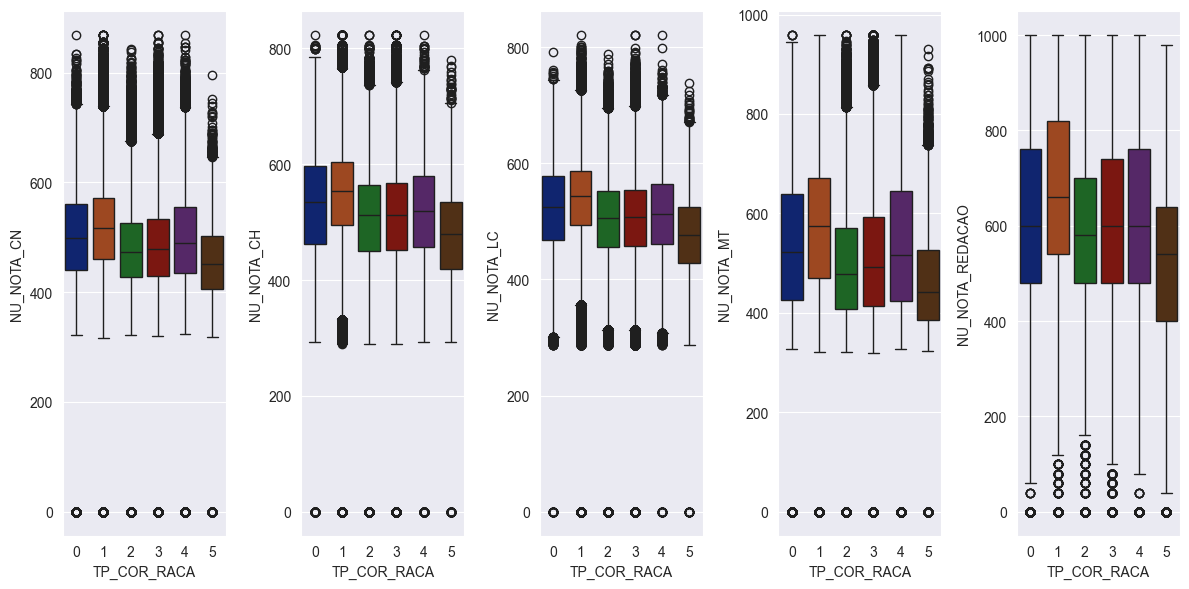

In [61]:
# Analyzing grades by Ethnicity
figure, axes = plt.subplots(1, len(columns_grades), figsize=(12,6))

for i in range(0, len(columns_grades)):
    sns.boxplot(data = df_ethnic, x='TP_COR_RACA', y=columns_grades[i], ax= axes[i], hue='TP_COR_RACA', palette="dark", legend=None)
    plt.tight_layout()

<h3 style="color:cornflowerblue">Region Information</h3>

In [62]:
# creating region dataframe

df_region = df_enem.loc[:, columns_grades + ['SG_UF_ESC']]
df_region.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,SG_UF_ESC
0,NaN,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,NaN,None
2,502.00,498.90,475.60,363.20,700.00,None
3,459.00,508.50,507.20,466.70,880.00,CE
4,402.50,379.20,446.90,338.30,560.00,CE


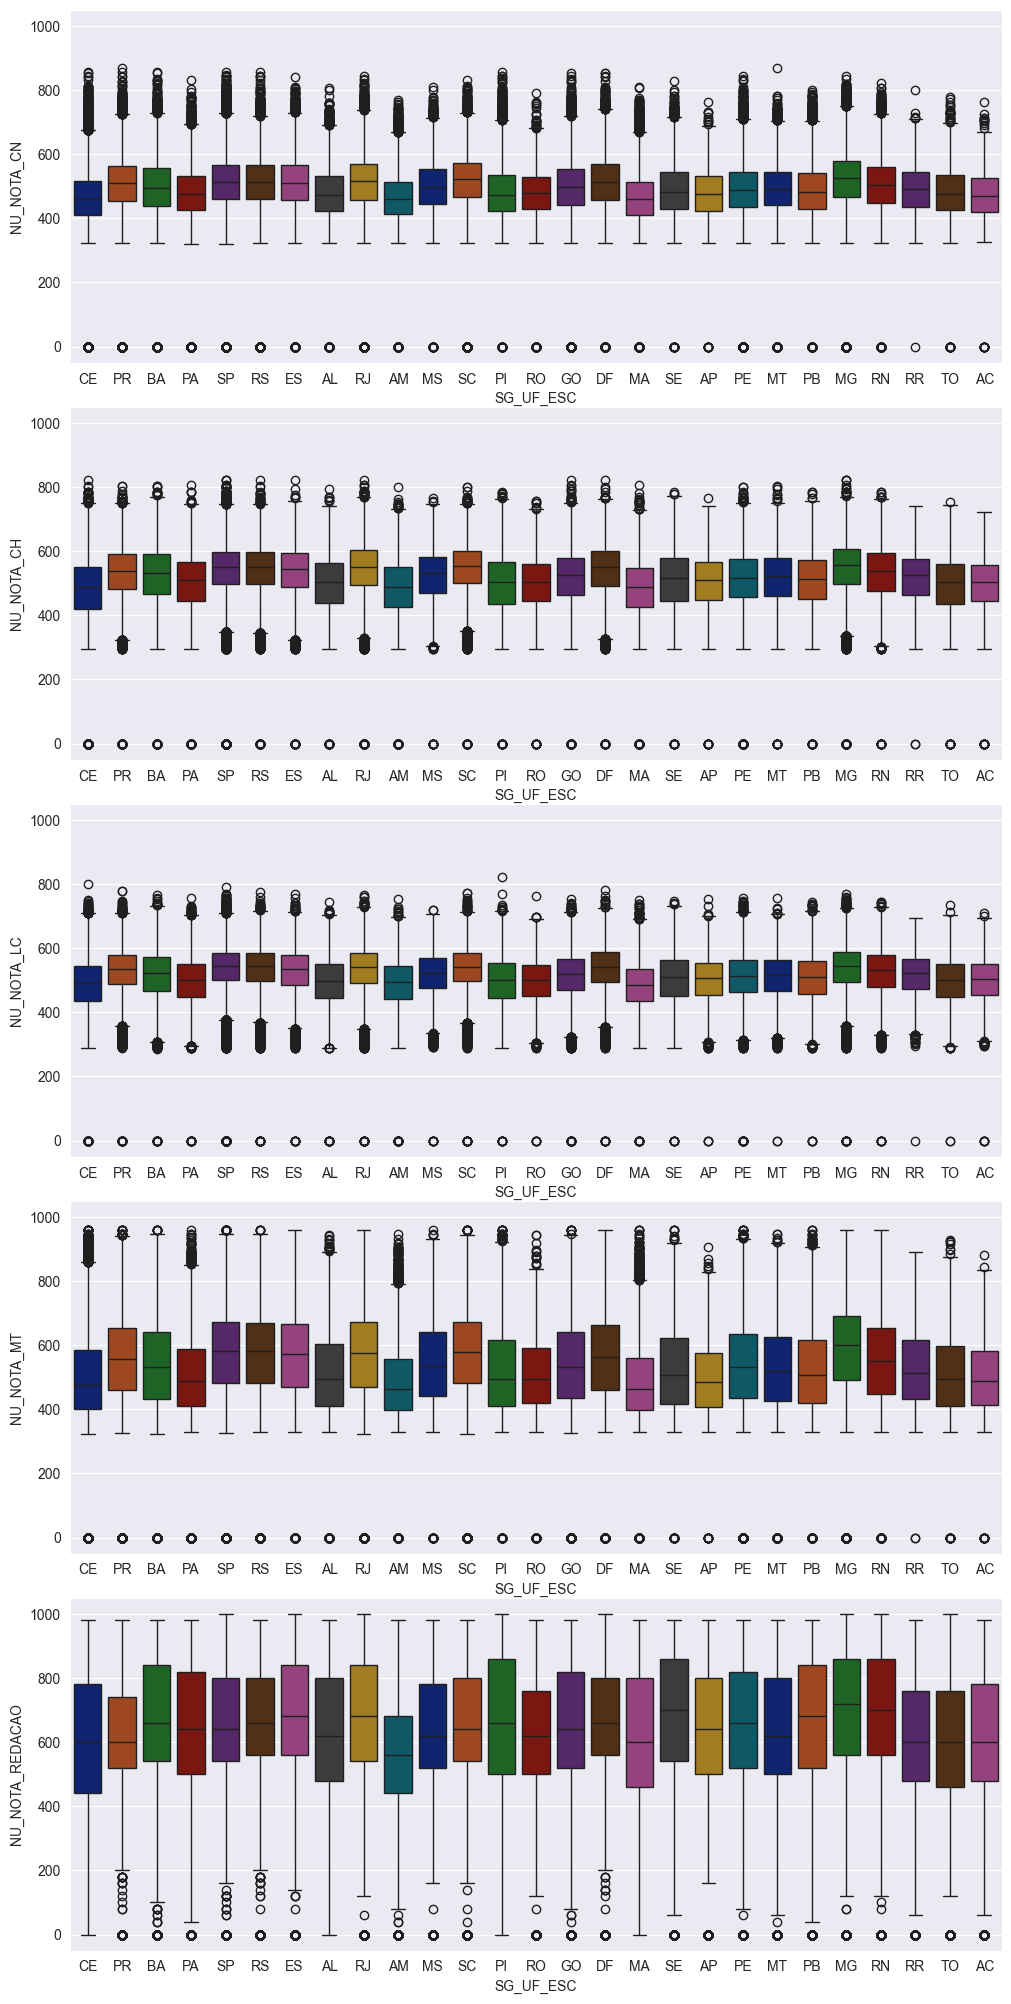

In [63]:
# Analyzing Region
figure, axes = plt.subplots(ncols=1, nrows=len(columns_grades), sharey=True, figsize=(10,20))
plt.tight_layout()

for i in range(0, len(columns_grades)):
    sns.boxplot(data = df_region, x='SG_UF_ESC', y=columns_grades[i], ax= axes[i], hue='SG_UF_ESC', palette="dark", legend=None)

<h3 style="color:cornflowerblue">Parents Instruction Information</h3>

In [64]:
# Parents Instruction Dataframe

df_pinstruction = df_enem.loc[:, columns_grades + ['M_HIGHER_ED','F_HIGHER_ED']]
df_pinstruction.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,M_HIGHER_ED,F_HIGHER_ED
0,NaN,NaN,NaN,NaN,NaN,False,True
1,NaN,NaN,NaN,NaN,NaN,True,False
2,502.00,498.90,475.60,363.20,700.00,False,False
3,459.00,508.50,507.20,466.70,880.00,False,False
4,402.50,379.20,446.90,338.30,560.00,False,False


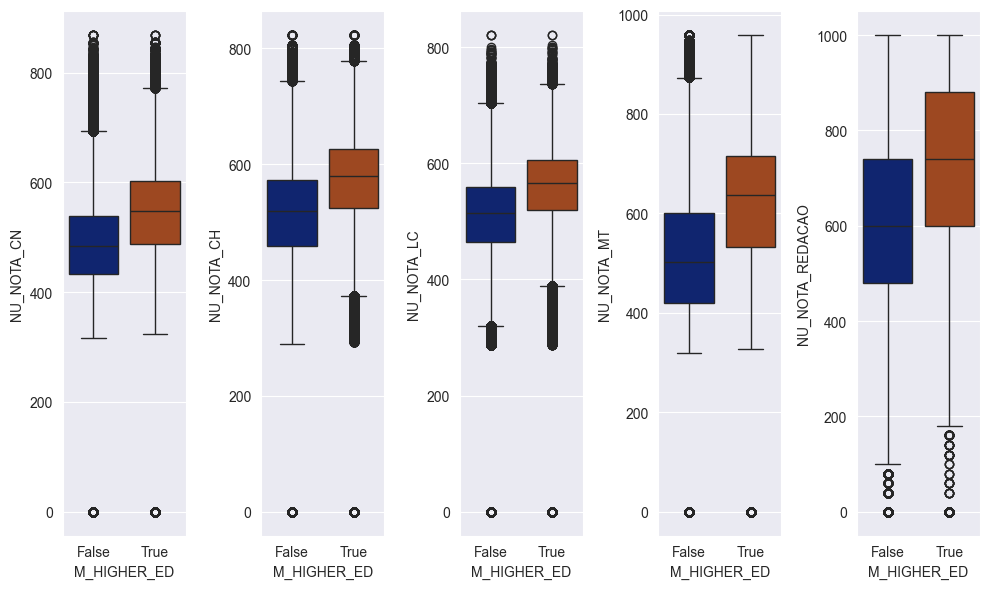

In [65]:
# Analyzing Parents Instruction (Father / Male Guardian)
figure, axes = plt.subplots(1, len(columns_grades), figsize=(10,6))

for i in range(0,len(columns_grades)):
    sns.boxplot(data = df_pinstruction, x="M_HIGHER_ED", y=columns_grades[i], ax=axes[i], hue='M_HIGHER_ED', palette="dark", legend=None)
    plt.tight_layout()

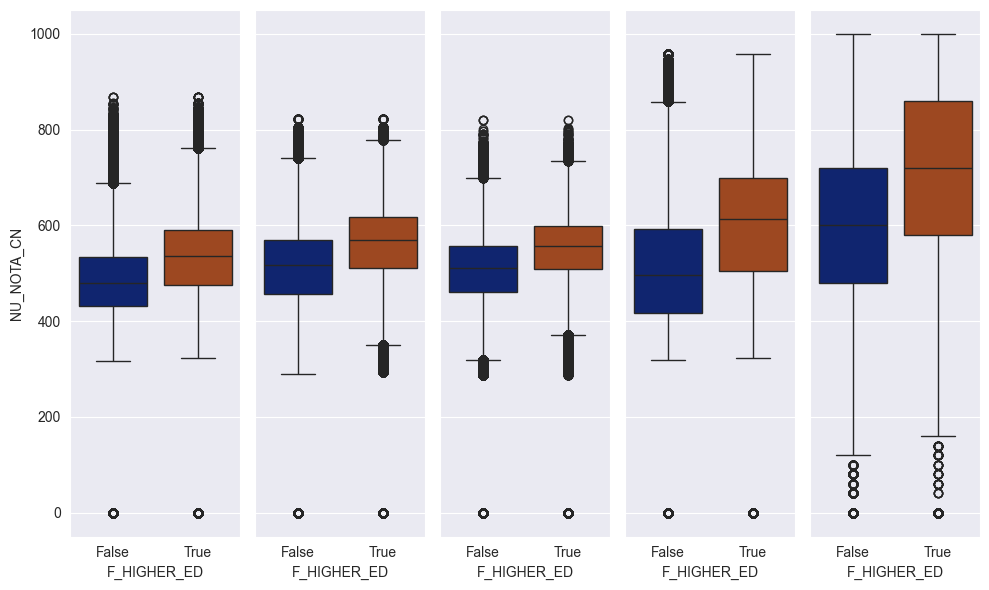

In [66]:
# Analyzing Parents Instruction (Mother / Female Guardian)
figure, axes = plt.subplots(1,len(columns_grades), figsize=(10,6))

for i in range(0, len(columns_grades)):
    sns.boxplot(data = df_pinstruction, x='F_HIGHER_ED', y=columns_grades[i], ax=axes[i], hue='F_HIGHER_ED', palette="dark", legend=None)
    plt.tight_layout()

<h3 style="color:cornflowerblue">Family Income</h3>

In [67]:
# Creating a income dataframe
df_income = df_enem.loc[:, columns_grades + ['FAM_INC']]
df_income.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FAM_INC
0,NaN,NaN,NaN,NaN,NaN,5
1,NaN,NaN,NaN,NaN,NaN,7
2,502.00,498.90,475.60,363.20,700.00,2
3,459.00,508.50,507.20,466.70,880.00,2
4,402.50,379.20,446.90,338.30,560.00,1


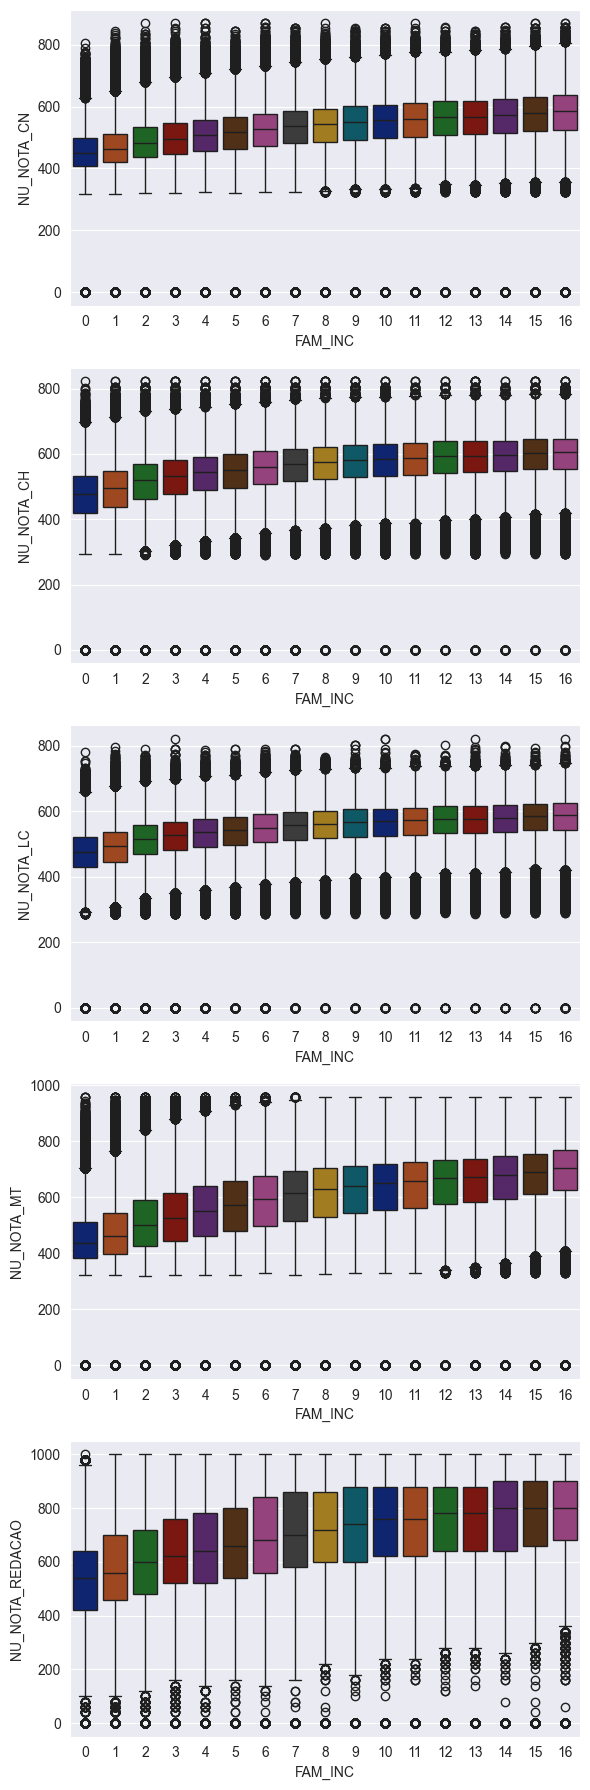

In [68]:
# Analyzing Family Income
figure, axes = plt.subplots(ncols=1 , nrows=len(columns_grades), figsize=(6,18))

for i in range(0, len(columns_grades)):
    sns.boxplot(data=df_income, x='FAM_INC', y=columns_grades[i], ax=axes[i], hue='FAM_INC', palette="dark", legend=None)
    plt.tight_layout()

<Axes: >

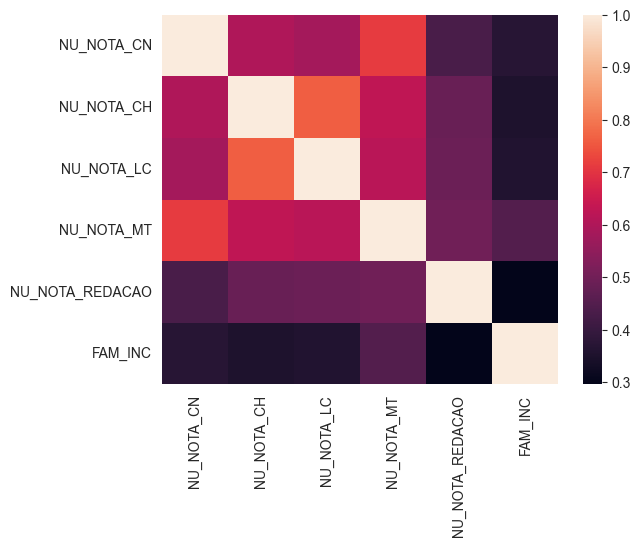

In [69]:
# Family Income Correlation

inc_corr = df_income.corr()
sns.heatmap(inc_corr)

<h2 style="color:cornflowerblue">Conclusions</h2>

<p>For the presented data, it can be seen that there are evidences of correlation of students grades with the following:
    <ul style = 'circle'><li>Ethnicity, specially for indigenous people;
    <li>Parents Instruction Level, specially on Math Grades;
    <li>Even if there isn`t a explicit correlation between grades and Family Income, there is a clear increase in general grades with the increase in family income. Aslo, Math Grades have a correlation of nearly 50% with Family Income.
    </ul>
</p>
<br>
<p>67% of the candidates families income is bellow R$2500.</p>
<p>The "standard" candidate is female, age of 18, single, brown, with family income of R$1500 or bellow, with both parents without higher education.</p>